# Unsupervised Learning

In [1]:
import numpy as np
import pandas as pd
from pylab import plt, mpl

plt.style.use('seaborn-v0_8')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision=4, suppress=True)

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [3]:
x, y = make_blobs(n_samples=100, centers=4,
                  random_state=500, cluster_std=1.25)

In [4]:
model = KMeans(n_clusters=4, random_state=0, n_init='auto')

In [5]:
model.fit(x)

d:\anaconda3\envs\finnlp\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [6]:
y_ = model.predict(x)

In [7]:
y_

array([1, 1, 0, 3, 0, 0, 1, 3, 0, 3, 3, 1, 3, 2, 2, 1, 3, 2, 3, 2, 2, 1,
       0, 3, 0, 0, 2, 2, 0, 1, 3, 0, 0, 2, 0, 1, 0, 1, 3, 3, 3, 0, 2, 2,
       1, 0, 3, 2, 3, 2, 1, 2, 0, 2, 0, 1, 0, 3, 2, 1, 0, 2, 1, 3, 1, 2,
       0, 0, 0, 3, 1, 0, 3, 2, 3, 1, 3, 2, 3, 3, 0, 1, 0, 1, 3, 3, 1, 3,
       2, 2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2], dtype=int32)

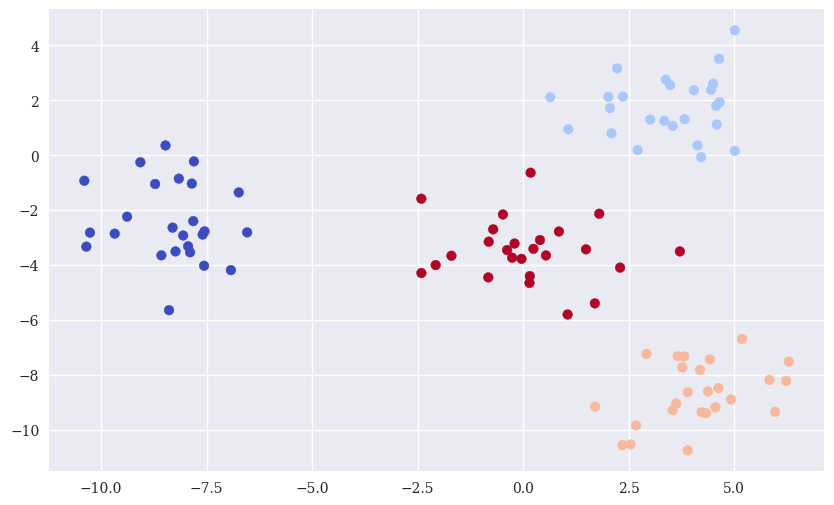

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=y_,  cmap='coolwarm')
plt.show()

# Reinforcement Learning

In [9]:
ssp = [1, 1, 1, 1, 0]
asp = [1, 0]

In [10]:
def epoch():
    tr = 0
    for _ in range(100):
        a = np.random.choice(asp)
        s = np.random.choice(ssp)
        if a == s:
            tr += 1
    return tr

In [11]:
rl = np.array([epoch() for _ in range(15)])
rl

array([41, 40, 42, 53, 49, 51, 50, 53, 45, 44, 53, 56, 48, 45, 49])

In [12]:
print(rl.mean())

47.93333333333333


In [13]:
ssp = [1, 1, 1, 1, 0]

In [14]:
def epoch():
    tr = 0
    asp = [0, 1]
    for _ in range(100):
        a = np.random.choice(asp)
        s = np.random.choice(ssp)
        if a == s:
            tr += 1
        asp.append(s)
    return tr

In [15]:
rl = np.array([epoch() for _ in range(15)])
rl

array([65, 61, 59, 56, 68, 58, 76, 70, 69, 67, 68, 66, 67, 57, 62])

In [16]:
print(rl.mean())

64.6


# Supervised Learning
## OLS Regression

In [17]:
def f(x):
    return 2 * x ** 2 - x ** 3 / 3

In [18]:
x = np.linspace(-2, 4, 25)
x

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ])

In [19]:
y = f(x)
y

array([10.6667,  7.9115,  5.625 ,  3.776 ,  2.3333,  1.2656,  0.5417,
        0.1302,  0.    ,  0.1198,  0.4583,  0.9844,  1.6667,  2.474 ,
        3.375 ,  4.3385,  5.3333,  6.3281,  7.2917,  8.1927,  9.    ,
        9.6823, 10.2083, 10.5469, 10.6667])

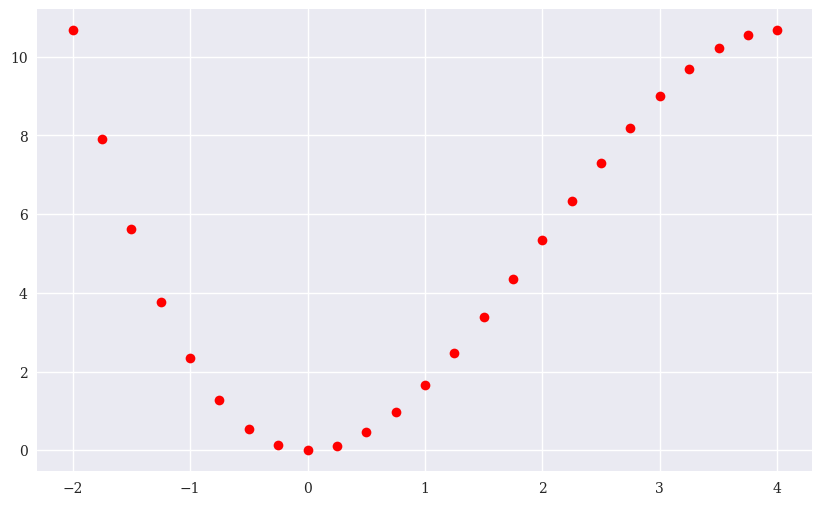

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro')
plt.show()

In [21]:
beta = np.cov(x, y, ddof=0)[0, 1] / np.var(x)
beta

np.float64(1.0541666666666667)

In [22]:
alpha = y.mean() - beta * x.mean()
alpha

np.float64(3.8625000000000003)

In [23]:
y_ = alpha + beta * x
MSE = ((y - y_) ** 2).mean()
print(MSE)


10.721953125


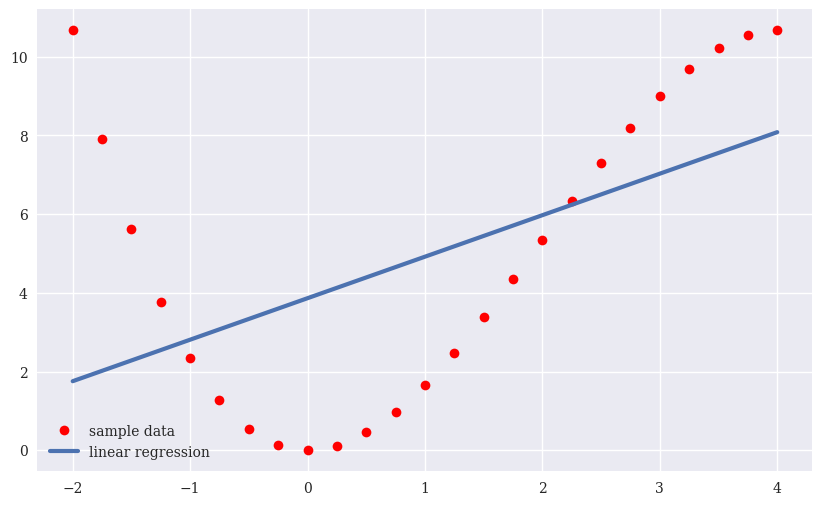

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='linear regression')
plt.legend()
plt.show()


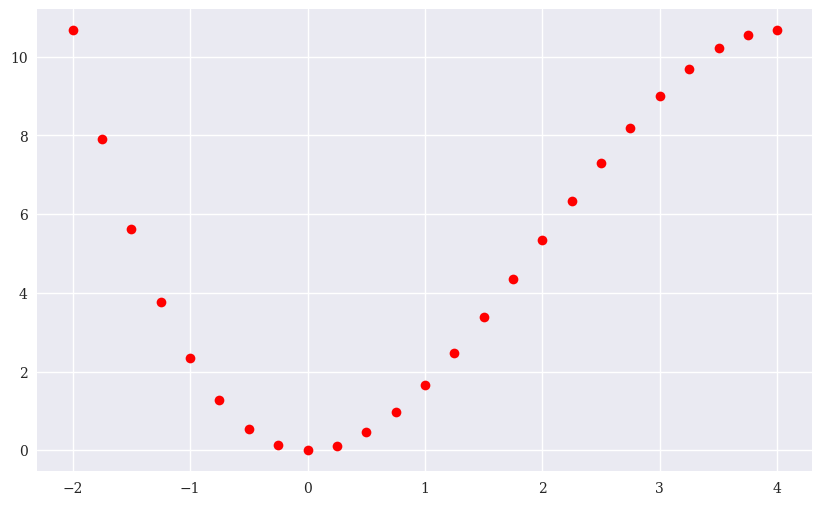

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.show()


deg=1 | MSE=10.72195
deg=2 | MSE=2.31258
deg=3 | MSE=0.00000


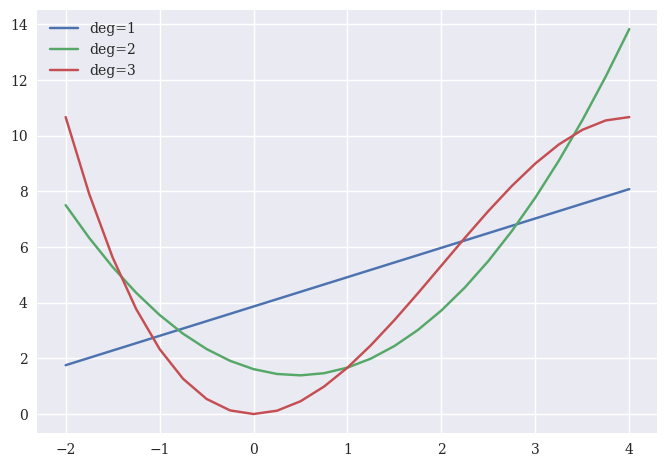

In [26]:
for deg in [1, 2, 3]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg} | MSE={MSE:.5f}')
    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
plt.legend()
plt.show()


In [27]:
reg


array([-0.3333,  2.    ,  0.    , -0.    ])

## Neural Network &mdash; `sklearn`


In [28]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=3 * [256],
                     learning_rate_init=0.03,
                     max_iter=5000)


In [29]:
model.fit(x.reshape(-1, 1), y)
y_ = model.predict(x.reshape(-1, 1))


In [30]:
MSE = ((y - y_) ** 2).mean()
print(MSE)


0.008047489571406633


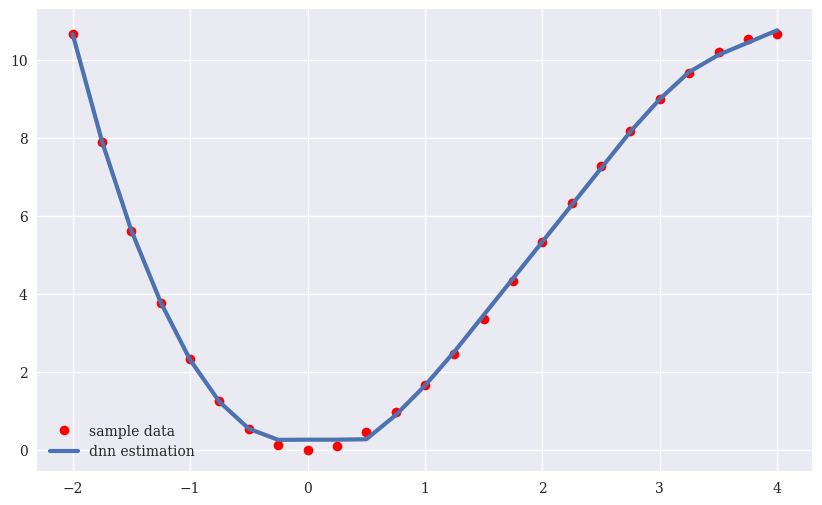

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='dnn estimation')
plt.legend()
plt.show()


## Neural Network &mdash; `Keras`


In [32]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(100)
from keras.layers import Dense
from keras.models import Sequential


In [33]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1)) # <2>
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')


d:\anaconda3\envs\finnlp\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
((y - y_) ** 2).mean()


np.float64(0.008047489571406633)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
round=1 | MSE=3.96737
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
round=2 | MSE=0.81222
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
round=3 | MSE=0.20739
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
round=4 | MSE=0.12089
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
round=5 | MSE=0.10493


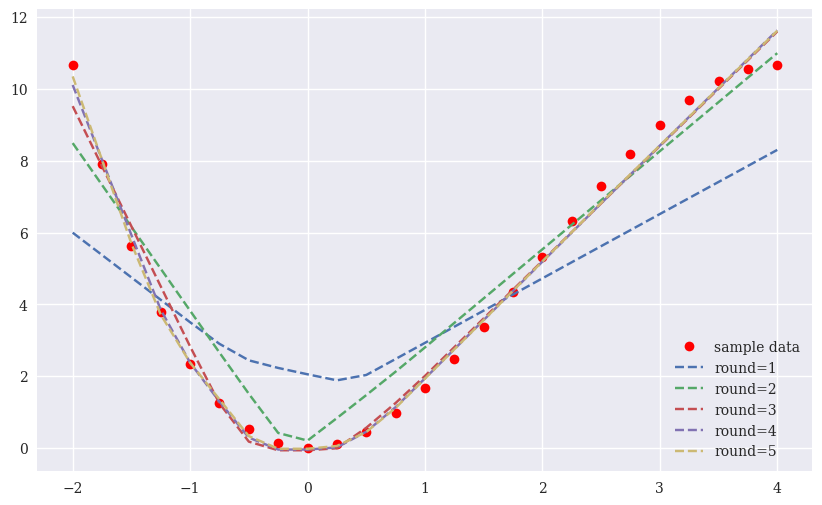

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 6):
    model.fit(x, y, epochs=100, verbose=False)
    y_ =  model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend()
plt.show()


# Universal Approximation


In [36]:
np.random.seed(0)
x = np.linspace(-1, 1)
y = np.random.random(len(x)) * 2 - 1


deg= 1 | MSE=0.28153
deg= 5 | MSE=0.27331
deg= 9 | MSE=0.25442
deg=11 | MSE=0.23458
deg=13 | MSE=0.22989
deg=15 | MSE=0.21672


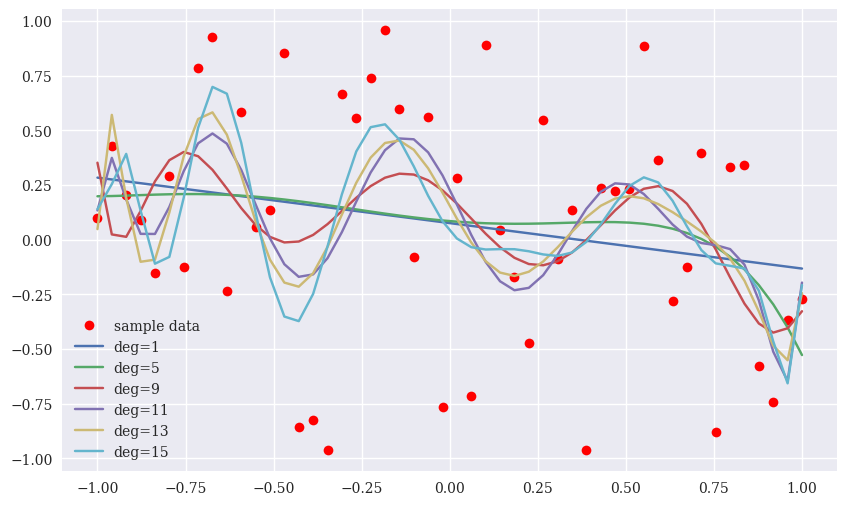

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 5, 9, 11, 13, 15]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg:2d} | MSE={MSE:.5f}')
    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
plt.legend()
plt.show()


In [38]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
for _ in range(3):
    model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 256)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,145 (774.00 KB)

 Trainable params: 198,145 (774.00 KB)

 Non-trainable params: 0 (0.00 B)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
round=1 | MSE=0.14852
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
round=2 | MSE=0.10941
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
round=3 | MSE=0.07522
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
round=4 | MSE=0.07789
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
round=5 | MSE=0.07192
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
round=6 | MSE=0.02692
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
round=7 | MSE=0.10543


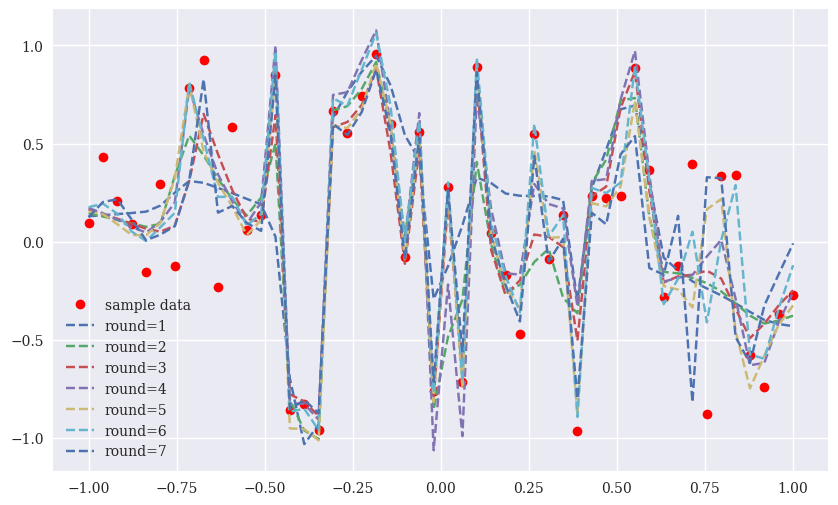

CPU times: total: 2min 58s
Wall time: 2min 13s


In [39]:
%%time
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 8):
    model.fit(x, y, epochs=500, verbose=False)
    y_ =  model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend()
plt.show()